# Finance Data Project - Solutions

[financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data


*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [8]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data


*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)



In [29]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [30]:
# Bank of America
BAC=data.DataReader('BAC', 'yahoo')

# CitiGroup
C=data.DataReader('C', 'yahoo')

# Goldman Sachs
GS=data.DataReader('GS', 'yahoo')

# JPMorgan Chase
JPM=data.DataReader('JPM', 'yahoo')

# Morgan Stanley
MS=data.DataReader('MS', 'yahoo')

# Wells Fargo
WFC=data.DataReader('WFC', 'yahoo')


In [31]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [33]:
df.head()

Attributes       High                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  47.180000  493.799988  129.440002  40.360001  58.490002   
2006-01-04  47.240002  491.000000  128.910004  40.139999  59.279999   
2006-01-05  46.830002  487.799988  127.320000  39.810001  58.590000   
2006-01-06  46.910000  489.000000  129.250000  40.240002  58.849998   
2006-01-09  46.970001  487.399994  130.619995  40.720001  59.290001   

Attributes                   Low                                     \
Symbols           WFC        BAC           C          GS        JPM   
Date                                                                  
2006-01-03  31.975000  46.150002  481.100006  124.230003  39.299999   
2006-01-04  31.820000  46.450001  483.500000  126.379997  39.419998   
2006-01-05  31.555000  46.320000  484.000000  125.610001  39.500000   
2006-01-06  31.775000  46.349998  482.000000  127.290001  39.549999   
2006-01-09  31.825001  46.360001  483.000000  128.000000  39.880001   

Attributes    ...         Volume                                     \
Symbols       ...             GS         JPM         MS         WFC   
Date          ...                                                     
2006-01-03    ...      6188700.0  12838600.0  5377000.0  11016400.0   
2006-01-04    ...      4861600.0  13491500.0  7977800.0  10870000.0   
2006-01-05    ...      3717400.0   8109400.0  5778000.0  10158000.0   
2006-01-06    ...      4319600.0   7966900.0  6889800.0   8403800.0   
2006-01-09    ...      4723500.0  16575200.0  4144500.0   5619600.0   

Attributes  Adj Close                                                           
Symbols           BAC           C          GS        JPM         MS        WFC  
Date                                                                            
2006-01-03  36.332104  458.047638  110.464439  28.635843  38.834549  21.693670  
2006-01-04  35.946239  449.590973  108.938675  28.470566  38.861198  21.442055  
2006-01-05  35.992565  451.821289  108.895821  28.556803  38.967754  21.418251  
2006-01-06  35.938522  451.821289  110.438721  28.758003  39.007713  21.544062  
2006-01-09  35.961674  449.683960  111.767372  29.225082  39.420616  21.540665  

[5 rows x 36 columns]

In [34]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [35]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [36]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [37]:
bank_stocks.head()

Bank Ticker        BAC                                                \
Stock Info        High        Low       Open      Close       Volume   
Date                                                                   
2010-01-04   15.750000  15.120000  15.240000  15.690000  180845200.0   
2010-01-05   16.209999  15.700000  15.740000  16.200001  209521300.0   
2010-01-06   16.540001  16.030001  16.209999  16.389999  205257900.0   
2010-01-07   17.190001  16.510000  16.680000  16.930000  320868400.0   
2010-01-08   17.100000  16.629999  16.980000  16.780001  220104700.0   

Bank Ticker                     C                                     ...      \
Stock Info   Adj Close       High        Low       Open      Close    ...       
Date                                                                  ...       
2010-01-04   14.420351  34.099998  33.400002  33.599998  34.000000    ...       
2010-01-05   14.889081  35.500000  34.099998  34.200001  35.299999    ...       
2010-01-06   15.063710  36.799999  35.099998  35.599998  36.400002    ...       
2010-01-07   15.560015  37.000000  36.099998  36.900002  36.500000    ...       
2010-01-08   15.422150  36.700001  35.099998  36.500000  35.900002    ...       

Bank Ticker         MS                                      WFC             \
Stock Info        Open      Close      Volume  Adj Close   High        Low   
Date                                                                         
2010-01-04   30.700001  30.910000  20371000.0  26.912815  27.48  26.820000   
2010-01-05   31.010000  32.040001  22523400.0  27.896694  28.24  27.240000   
2010-01-06   31.969999  32.450001  17028500.0  28.253670  28.33  27.790001   
2010-01-07   32.459999  32.919998  18693000.0  28.662886  29.43  27.920000   
2010-01-08   32.599998  32.250000  15993400.0  28.079533  29.35  28.600000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2010-01-04   27.020000  27.320000  39335700.0  21.687147  
2010-01-05   27.270000  28.070000  55416000.0  22.282515  
2010-01-06   28.030001  28.110001  33237000.0  22.314264  
2010-01-07   28.120001  29.129999  61649000.0  23.123959  
2010-01-08   28.900000  28.860001  35508700.0  22.909628  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [38]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     32.840000
C       80.080002
GS     273.380005
JPM    118.769997
MS      58.910000
WFC     65.930000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [39]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [40]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2010-01-04         NaN       NaN        NaN         NaN        NaN         NaN
2010-01-05    0.032505  0.038235   0.017680    0.019370   0.036558    0.027452
2010-01-06    0.011728  0.031162  -0.010673    0.005494   0.012796    0.001425
2010-01-07    0.032947  0.002747   0.019568    0.019809   0.014484    0.036286
2010-01-08   -0.008860 -0.016438  -0.018911   -0.002456  -0.020352   -0.009269

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

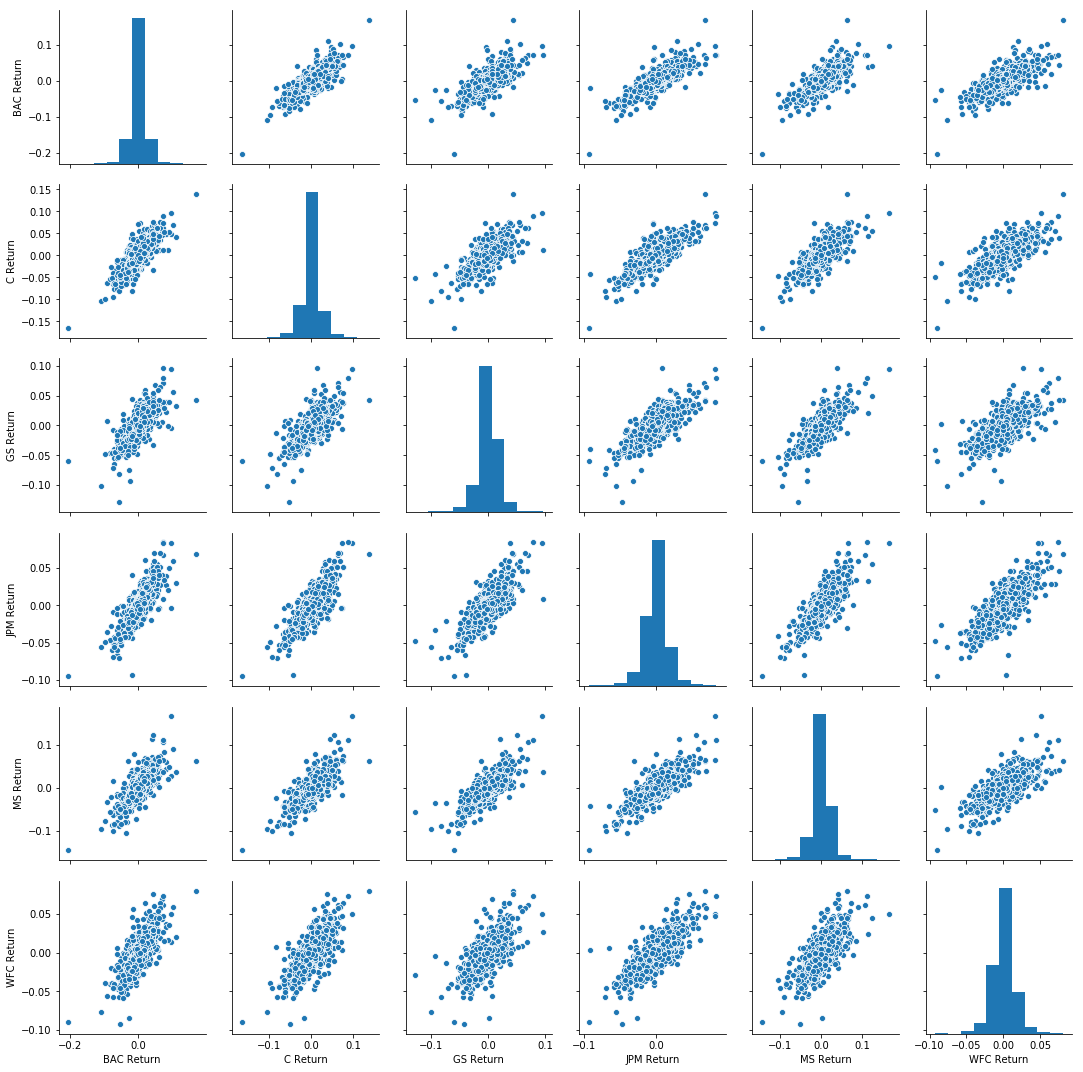

In [41]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 


** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [42]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2011-08-08
C Return     2011-08-08
GS Return    2010-04-16
JPM Return   2011-08-08
MS Return    2011-08-08
WFC Return   2018-02-05
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [43]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2011-08-09
C Return     2011-08-09
GS Return    2019-01-16
JPM Return   2011-11-30
MS Return    2011-10-27
WFC Return   2011-08-09
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [44]:
returns.std() # Citigroup riskiest

BAC Return    0.020993
C Return      0.019909
GS Return     0.016660
JPM Return    0.016104
MS Return     0.021311
WFC Return    0.015407
dtype: float64

In [47]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

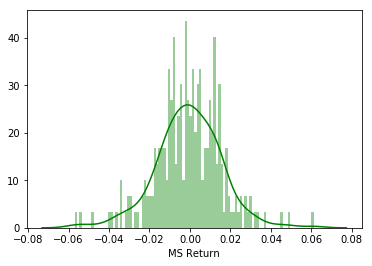

In [48]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

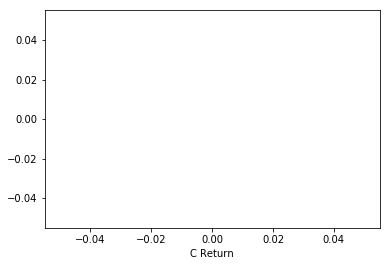

In [50]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

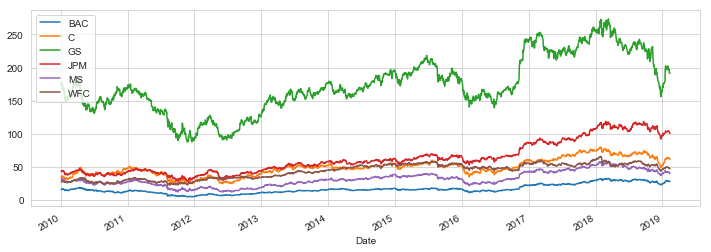

In [52]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

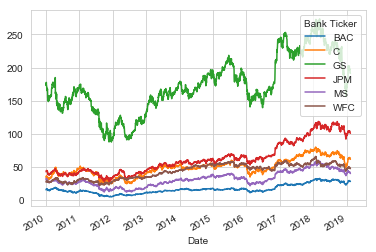

In [53]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [56]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2011. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2011**

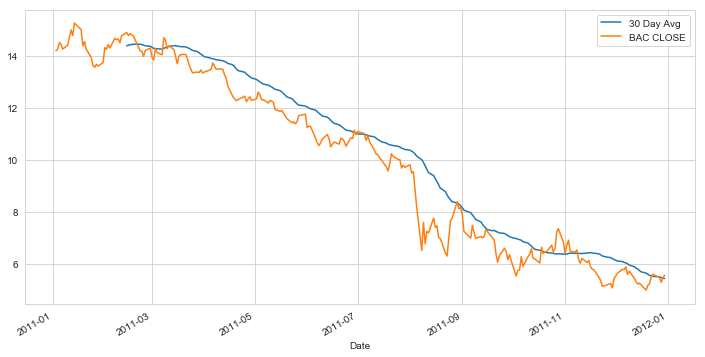

In [78]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2011-01-01':'2012-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2011-01-01':'2012-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

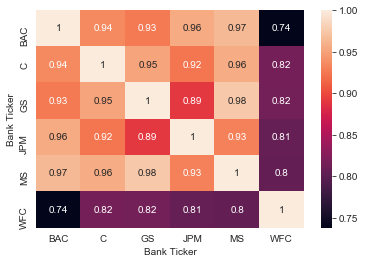

In [79]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

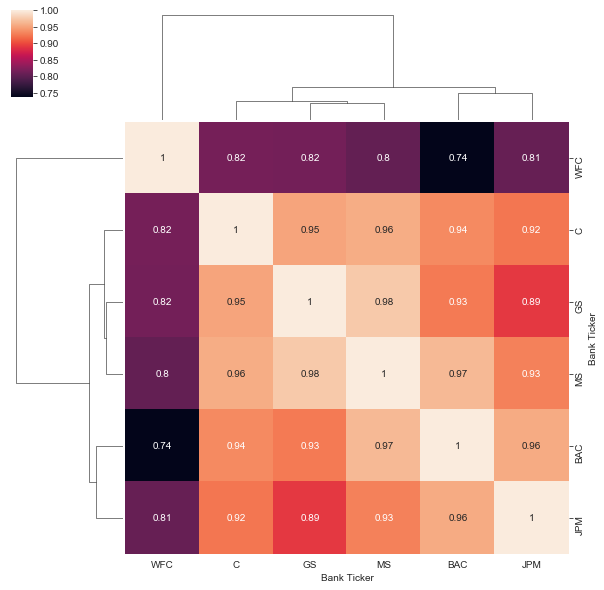

In [80]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [81]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [83]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [85]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [86]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')